In [23]:
import cv2
import math
import numpy as np
import glob
from datetime import datetime
from utilities import get_data, plot_res, plot_heatmap

In [12]:
training_set, train_ans, testing_set, test_ans = get_data(gray=True, size=16, normal=True)

training_set = np.array([x.flatten() for x in training_set])
testing_set = np.array([x.flatten() for x in testing_set])

In [14]:
print('=====KNN with cv2.ml.KNearest function=====')


knn = cv2.ml.KNearest_create()
knn.train(training_set, cv2.ml.ROW_SAMPLE, train_ans)

for k in range(5):
    start = datetime.now()
    ret, results, neighbours ,dist = knn.findNearest(testing_set, k+1)

    count = 0
    hit = 0
    for i in range(len(testing_set)):
        if results[i] == test_ans[i]:
            hit += 1
        count += 1
    end = datetime.now()
    print('accu with ', k+1, ' neighbors = ', hit/count)
    print('duration time = ', end - start)

best = 0
print('=====KNN with Manhattan diatance=====')

for k in range(5):
    start = datetime.now()
    results_self = []
    for i in range(len(testing_set)):
        store = []
        for j in range(len(training_set)):
            store.append(sum(abs(testing_set[i] - training_set[j])))
        ans_idxs = np.argsort(store)[0:k+1]
        final_idx = np.bincount(ans_idxs).argmax()
        results_self.append(train_ans[final_idx])

    count = 0
    hit = 0
    for i in range(len(testing_set)):
        if results_self[i] == test_ans[i]:
            hit += 1
        count += 1
    end = datetime.now()
    if hit>best:
        pred = results_self
        best=hit
    print('accu  with ', k+1, 'neighbors = ', hit/count)
    print('duration time = ', end - start)

=====KNN with cv2.ml.KNearest function=====
accu with  1  neighbors =  0.18666666666666668
duration time =  0:00:00.005766
accu with  2  neighbors =  0.14666666666666667
duration time =  0:00:00.004366
accu with  3  neighbors =  0.15333333333333332
duration time =  0:00:00.003487
accu with  4  neighbors =  0.16666666666666666
duration time =  0:00:00.002949
accu with  5  neighbors =  0.16
duration time =  0:00:00.002847
=====KNN with Manhattan diatance=====
accu  with  1 neighbors =  0.19333333333333333
duration time =  0:00:11.438312
accu  with  2 neighbors =  0.15333333333333332
duration time =  0:00:11.577621
accu  with  3 neighbors =  0.14
duration time =  0:00:11.355111
accu  with  4 neighbors =  0.14666666666666667
duration time =  0:00:11.374218
accu  with  5 neighbors =  0.14
duration time =  0:00:11.336181


In [20]:
pred_y = [int(x) for x in pred]
true_y = list(test_ans.astype(int))

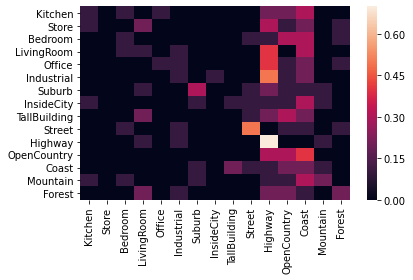

In [21]:
plot_heatmap(true_y,pred_y,'./result/heatmap_tiny')

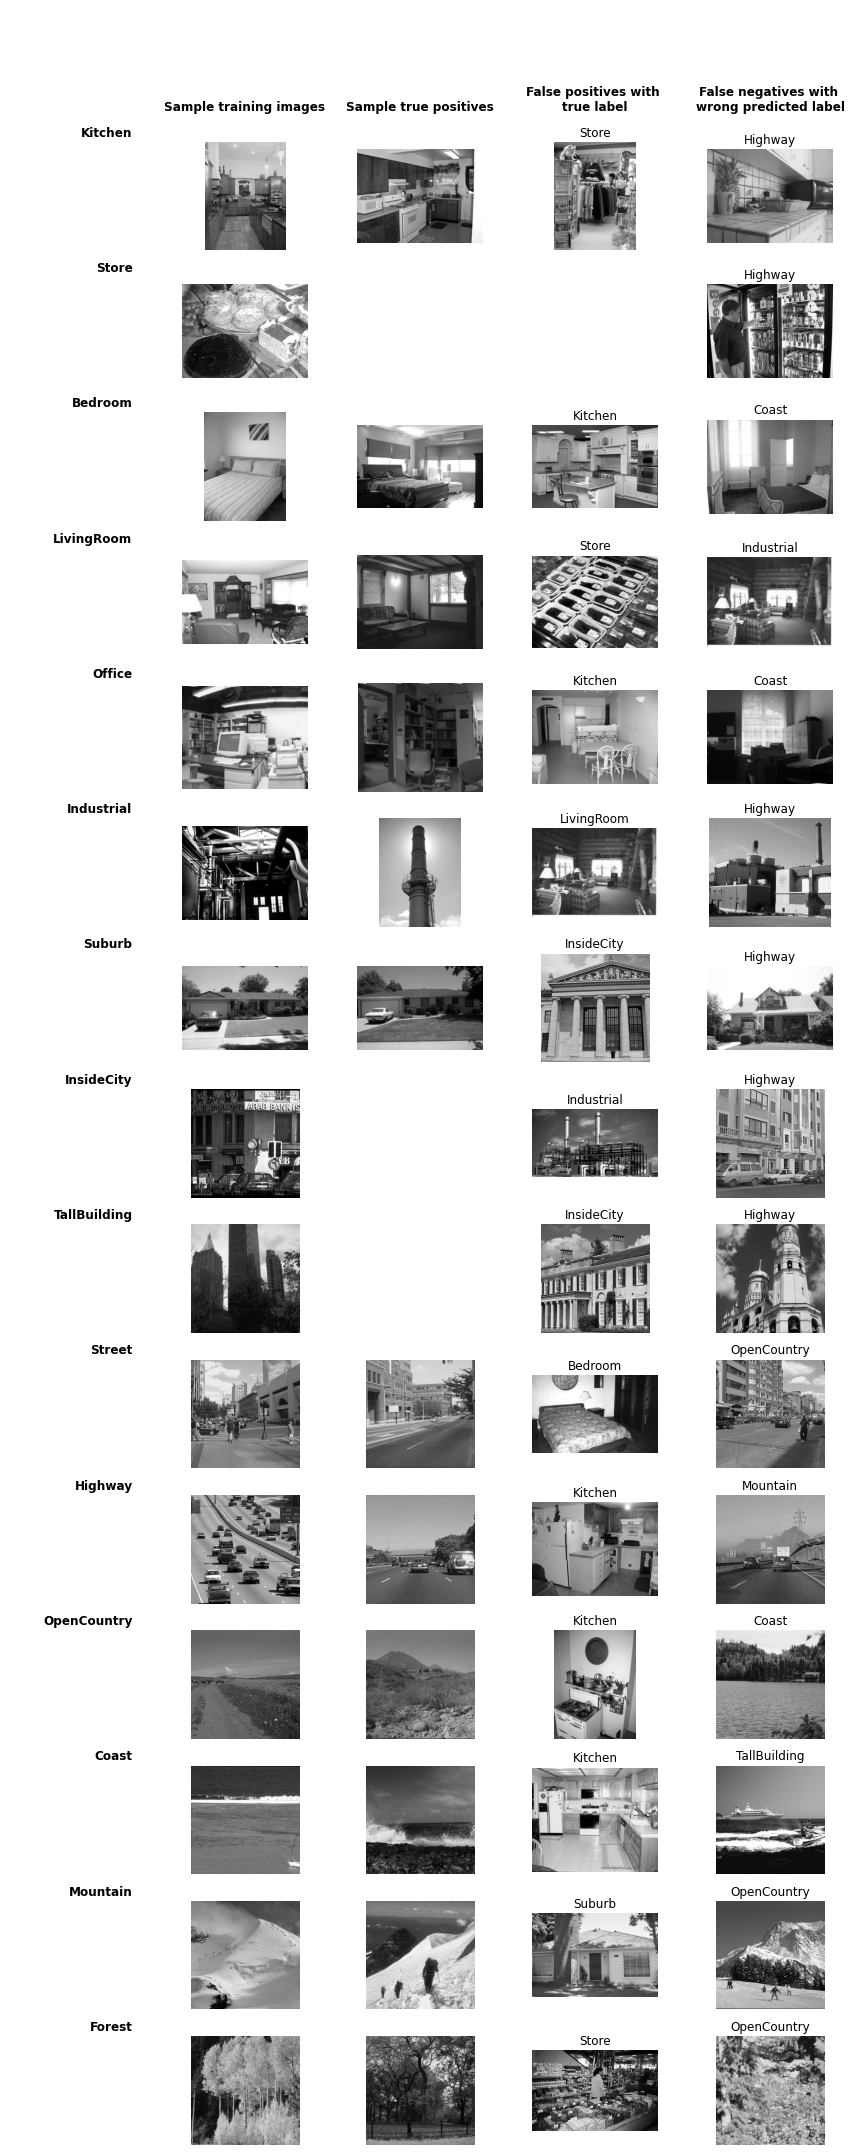

In [22]:
plot_res(true_y,pred_y,'./result/res_tiny')